In [32]:
import pandas as pd
voice = pd.DataFrame()

df= pd.read_csv('data/voice001.txt', encoding = 'utf8', engine = 'python',names=['X'+'001'])
df = df.iloc[1000:37000,:]

for i in range(2,209):
    i = str(i).zfill(3)
    df2= pd.read_csv('data/voice'+i+'.txt', encoding = 'utf8', engine = 'python',names=['X'+i])
    df2 = df2.iloc[1000:37000,:]
    df = pd.concat([df,df2],axis =1)

In [ ]:
voice.to_csv('voice.csv',encoding='utf-8-sig',index=True)

In [33]:
df.T

,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,...,36990,36991,36992,36993,36994,36995,36996,36997,36998,36999
X001,0.149567,0.071198,-0.059723,-0.178131,-0.132202,-0.003967,0.026703,0.026215,0.041962,0.010437,...,0.016602,-0.064056,-0.097137,-0.090973,-0.033600,0.017151,0.017639,0.003265,0.006134,-0.001038
X002,0.089233,-0.001251,-0.067017,-0.104034,-0.132782,-0.132965,-0.096497,-0.096741,-0.082336,-0.015778,...,0.352722,0.511993,0.824432,0.680908,0.289825,-0.086578,-0.563629,-0.857971,-0.630676,-0.185425
X003,0.062897,0.151031,0.266998,0.405518,0.487610,0.253662,-0.008057,-0.308472,-0.412109,-0.251862,...,-0.519928,-0.512085,-0.149445,-0.009613,0.468384,0.318359,0.112793,0.150574,0.180725,0.043945
X004,0.004730,0.013550,0.022614,0.016541,0.012939,0.007660,0.013916,0.019287,0.007599,0.001190,...,0.066498,0.062531,0.056213,0.049347,0.060120,0.044464,0.022919,0.018494,0.029755,0.037109
X005,-0.005310,0.002472,0.008759,0.036743,0.085785,0.018433,-0.022461,-0.076935,-0.063171,-0.022339,...,-0.006897,0.153046,0.163330,-0.007385,-0.174255,-0.220795,-0.163971,0.048859,0.100281,0.151031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X204,-0.005066,-0.039825,-0.066040,-0.061066,-0.066162,0.009003,0.111176,0.134918,0.127655,0.015320,...,-0.003052,-0.001648,-0.000305,0.000702,0.000153,0.000000,0.003448,0.002899,0.000153,0.000702
X205,-0.064301,-0.058929,-0.014862,0.075562,0.102753,0.075073,0.013672,-0.083618,-0.121521,-0.101044,...,0.507355,0.332886,-0.007721,-0.255066,-0.304199,-0.161865,0.042633,0.250488,0.354462,0.326385
X206,-0.068970,-0.013153,0.004669,0.045746,0.053162,-0.020050,-0.072449,-0.095734,0.059570,0.263794,...,-0.158722,-0.087860,0.003265,-0.013153,-0.158600,-0.329346,-0.394836,0.136108,0.744354,0.744995
X207,-0.028442,-0.020660,-0.020355,-0.023071,-0.040924,-0.067932,-0.071289,-0.098297,-0.087158,-0.061249,...,-0.237946,-0.217163,-0.271942,-0.101898,0.172211,0.379486,0.445099,0.221680,-0.130341,-0.364197


In [3]:
df.T.to_csv('voice2.csv',encoding='utf-8-sig',index=True)

In [1]:
import pandas as pd
data = pd.read_csv('voice2.csv')

In [3]:
audio_data = data.iloc[0, 1:].values
from python_speech_features import mfcc
mfcc_feat = mfcc(audio_data, samplerate=16000, numcep=13, nfilt=26, nfft=512)

In [14]:
from python_speech_features import mfcc

mfcc_features = []
for i in range(len(data)):
    # 각 행의 음성 데이터를 추출합니다.
    audio_data = data.iloc[i, 1:].values
    
    # MFCC를 계산합니다.
    mfcc_feat = mfcc(audio_data, samplerate=16000, numcep=13, nfilt=26, nfft=512)
    
    # 추출한 MFCC를 리스트에 추가합니다.
    mfcc_features.append(mfcc_feat)


In [15]:
import numpy as np

mfcc_means = np.array([np.mean(x, axis=0) for x in mfcc_features])
mfcc_std = np.array([np.std(x, axis=0) for x in mfcc_features])
mfcc_max = np.array([np.max(x, axis=0) for x in mfcc_features])
mfcc_min = np.array([np.min(x, axis=0) for x in mfcc_features])

In [16]:
df = pd.DataFrame(mfcc_means)
df2 = pd.DataFrame(mfcc_std)
df3 = pd.DataFrame(mfcc_max)
df4 = pd.DataFrame(mfcc_min)

In [17]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.618037,-15.756705,-38.588869,-3.448454,4.319198,-1.236705,-20.402460,11.689924,-31.727260,6.481992,11.732066,-29.505865,5.423225
1,1.921559,-9.717677,-41.576774,-10.900598,13.452557,2.702123,-11.242427,10.223502,-22.527784,0.662647,21.555453,-20.142810,-8.306223
2,2.013353,-20.991752,-30.904030,-12.173715,14.313278,-13.412429,-7.870880,6.359526,-17.783944,3.823256,-5.673536,-33.752746,6.880923
3,-1.608847,-17.680701,-20.072396,4.782521,-5.840264,-25.665602,1.385689,-39.374117,-18.427649,-3.466926,-10.441496,21.069486,6.485338
4,1.315625,-18.925273,-32.668049,1.480399,16.854854,-23.075581,-7.541070,-4.931546,-8.020375,-10.752270,-22.292733,15.512823,2.602270
...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.008287,-15.215448,-31.863006,-6.691802,20.489727,-36.788971,-10.391238,9.879974,-8.260307,11.227608,4.886079,16.538982,-0.243558
204,1.587307,-15.912965,-39.797740,-8.189078,7.978469,-20.428357,3.972384,-7.034989,-8.733844,-2.116612,17.658489,-0.337411,5.199406
205,2.808262,-26.682875,-30.802798,9.916491,8.521341,-21.453962,3.660179,15.744393,-7.571657,20.708679,-11.499853,-17.035974,-25.499361
206,1.306592,-13.472549,-35.046575,-10.954743,21.692898,-16.060246,-7.251412,-9.519183,-18.552261,9.174994,-6.230006,-10.721354,10.579302


In [18]:
df.columns = ['mfcc_means_1', 'mfcc_means_2', 'mfcc_means_3', 'mfcc_means_4','mfcc_means_5',
            'mfcc_means_6','mfcc_means_7','mfcc_means_8','mfcc_means_9','mfcc_means_10','mfcc_means_11','mfcc_means_12','mfcc_means_13']
df2.columns = ['mfcc_std_1', 'mfcc_std_2', 'mfcc_std_3', 'mfcc_std_4','mfcc_std_5',
            'mfcc_std_6','mfcc_std_7','mfcc_std_8','mfcc_std_9','mfcc_std_10','mfcc_std_11','mfcc_std_12','mfcc_std_13']
df3.columns = ['mfcc_max_1', 'mfcc_max_2', 'mfcc_max_3', 'mfcc_max_4','mfcc_max_5',
            'mfcc_max_6','mfcc_max_7','mfcc_max_8','mfcc_max_9','mfcc_max_10','mfcc_max_11','mfcc_max_12','mfcc_max_13']
df4.columns = ['mfcc_min_1', 'mfcc_min_2', 'mfcc_min_3', 'mfcc_min_4','mfcc_min_5',
            'mfcc_min_6','mfcc_min_7','mfcc_min_8','mfcc_min_9','mfcc_min_10','mfcc_min_11','mfcc_min_12','mfcc_min_13']

In [22]:
df4

,mfcc_min_1,mfcc_min_2,mfcc_min_3,mfcc_min_4,mfcc_min_5,mfcc_min_6,mfcc_min_7,mfcc_min_8,mfcc_min_9,mfcc_min_10,mfcc_min_11,mfcc_min_12,mfcc_min_13
0,-0.279951,-26.884820,-47.793386,-15.709607,-9.505241,-16.102922,-36.335691,-5.139461,-46.719964,-12.568999,-4.303305,-41.317394,-4.635561
1,1.117045,-23.142715,-55.425878,-23.439058,-0.950511,-14.797398,-28.573109,-4.634030,-35.929254,-9.772592,6.979124,-34.236249,-21.531325
2,1.135361,-30.316813,-46.248523,-23.655445,-3.092067,-27.233299,-27.734741,-14.469244,-35.382651,-12.456068,-19.865665,-48.849005,-7.032750
3,-3.309840,-23.653105,-28.048973,-7.149332,-23.202233,-39.195656,-14.989989,-50.826593,-26.688579,-14.981185,-23.961975,10.908490,-9.362820
4,-0.946481,-30.213131,-46.300712,-14.886607,1.224758,-42.154004,-22.111546,-26.419991,-25.360480,-26.974776,-33.149233,5.472714,-8.222983
...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,-7.410098,-26.939752,-44.768049,-21.296763,-16.278582,-55.731896,-30.965520,-19.566374,-23.483210,-6.266527,-9.106512,-5.705609,-11.503395
204,0.832710,-27.852024,-58.259091,-30.119780,-14.678229,-46.650042,-18.578621,-21.485969,-21.506617,-14.739780,-4.507495,-16.028966,-7.062525
205,1.780409,-42.647437,-47.001449,-7.305834,-6.097989,-37.333107,-8.387058,0.281039,-23.554340,7.584601,-28.907706,-31.330187,-36.560596
206,-0.153060,-21.926692,-49.546098,-26.242852,4.820513,-38.563941,-28.602700,-20.326222,-35.850651,-8.223386,-28.183578,-23.182590,0.917842


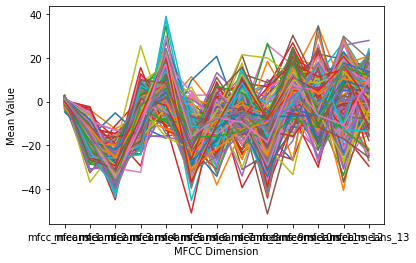

In [23]:
import matplotlib.pyplot as plt
plt.plot(df.T)
plt.xlabel('MFCC Dimension')
plt.ylabel('Mean Value')
plt.show()

In [24]:
mfcc = pd.concat([df, df2, df3,df4], axis=1)

In [25]:
mfcc

,mfcc_means_1,mfcc_means_2,mfcc_means_3,mfcc_means_4,mfcc_means_5,mfcc_means_6,mfcc_means_7,mfcc_means_8,mfcc_means_9,mfcc_means_10,...,mfcc_min_4,mfcc_min_5,mfcc_min_6,mfcc_min_7,mfcc_min_8,mfcc_min_9,mfcc_min_10,mfcc_min_11,mfcc_min_12,mfcc_min_13
0,0.618037,-15.756705,-38.588869,-3.448454,4.319198,-1.236705,-20.402460,11.689924,-31.727260,6.481992,...,-15.709607,-9.505241,-16.102922,-36.335691,-5.139461,-46.719964,-12.568999,-4.303305,-41.317394,-4.635561
1,1.921559,-9.717677,-41.576774,-10.900598,13.452557,2.702123,-11.242427,10.223502,-22.527784,0.662647,...,-23.439058,-0.950511,-14.797398,-28.573109,-4.634030,-35.929254,-9.772592,6.979124,-34.236249,-21.531325
2,2.013353,-20.991752,-30.904030,-12.173715,14.313278,-13.412429,-7.870880,6.359526,-17.783944,3.823256,...,-23.655445,-3.092067,-27.233299,-27.734741,-14.469244,-35.382651,-12.456068,-19.865665,-48.849005,-7.032750
3,-1.608847,-17.680701,-20.072396,4.782521,-5.840264,-25.665602,1.385689,-39.374117,-18.427649,-3.466926,...,-7.149332,-23.202233,-39.195656,-14.989989,-50.826593,-26.688579,-14.981185,-23.961975,10.908490,-9.362820
4,1.315625,-18.925273,-32.668049,1.480399,16.854854,-23.075581,-7.541070,-4.931546,-8.020375,-10.752270,...,-14.886607,1.224758,-42.154004,-22.111546,-26.419991,-25.360480,-26.974776,-33.149233,5.472714,-8.222983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.008287,-15.215448,-31.863006,-6.691802,20.489727,-36.788971,-10.391238,9.879974,-8.260307,11.227608,...,-21.296763,-16.278582,-55.731896,-30.965520,-19.566374,-23.483210,-6.266527,-9.106512,-5.705609,-11.503395
204,1.587307,-15.912965,-39.797740,-8.189078,7.978469,-20.428357,3.972384,-7.034989,-8.733844,-2.116612,...,-30.119780,-14.678229,-46.650042,-18.578621,-21.485969,-21.506617,-14.739780,-4.507495,-16.028966,-7.062525
205,2.808262,-26.682875,-30.802798,9.916491,8.521341,-21.453962,3.660179,15.744393,-7.571657,20.708679,...,-7.305834,-6.097989,-37.333107,-8.387058,0.281039,-23.554340,7.584601,-28.907706,-31.330187,-36.560596
206,1.306592,-13.472549,-35.046575,-10.954743,21.692898,-16.060246,-7.251412,-9.519183,-18.552261,9.174994,...,-26.242852,4.820513,-38.563941,-28.602700,-20.326222,-35.850651,-8.223386,-28.183578,-23.182590,0.917842


In [26]:
voice = pd.read_csv('voice.csv')

In [27]:
kk = pd.concat([voice,mfcc], axis=1)

In [29]:
kk = kk.iloc[:,1:]

In [30]:
kk.to_csv('mfcc.csv',encoding='utf-8-sig',index=True)

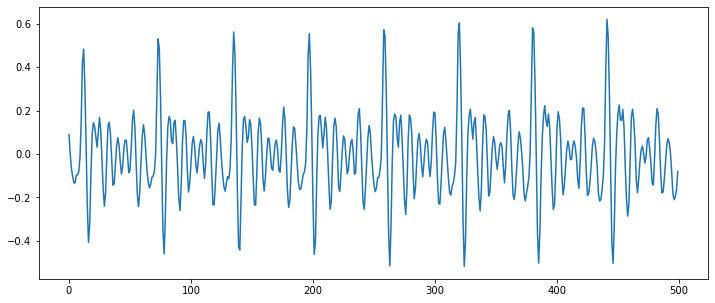

In [119]:
plt.figure(figsize=(12,5))
plt.plot(ary)

In [97]:
from scipy.fft import fft
import numpy as np
k =[]
for i in range(0,208):
    ary = np.array(df.T.iloc[i,:])
    fft2 = fft(ary)
    fft2 = fft2.reshape(36000)
    peaks, _ = find_peaks(fft2,height =200)
    k.append(len(peaks))

C:\Users\mix68\anaconda3\lib\site-packages\scipy\signal\_peak_finding.py:261: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)
C:\Users\mix68\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\mix68\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\mix68\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


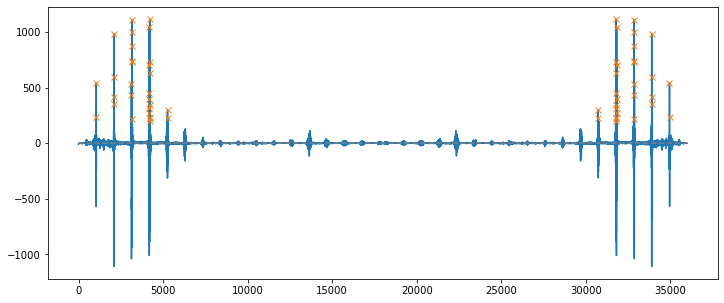

In [108]:
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
peaks, _ = find_peaks(fft2,height =200)
plt.figure(figsize=(12,5))
plt.plot(fft2)
plt.plot(peaks, fft2[peaks], "x")
plt.plot(np.zeros_like(fft2), "--", color="gray")
plt.show()

In [68]:
q0 = df.quantile(q=0, interpolation='nearest')
q25 = df.quantile(q=0.25, interpolation='nearest')
q5 = df.quantile(q=0.5,interpolation='nearest')
q75 = df.quantile(q=0.75, interpolation='nearest')
q1 = df.quantile(q=1, interpolation='nearest')
mean = df.mean(axis=0)
diff = q1-q0

In [69]:
diff

X001    1.049804
X002    1.778900
X003    1.682282
X004    0.336975
X005    1.121429
          ...   
X204    0.915252
X205    1.606506
X206    1.810486
X207    1.153382
X208    1.717682
Length: 208, dtype: float64

In [99]:
k2 = pd.Series(k)

In [100]:
k2.index = diff.index
k2

X001      2
X002    108
X003    118
X004      4
X005     64
       ... 
X204     28
X205     94
X206    152
X207     54
X208     58
Length: 208, dtype: int64

In [101]:
voice = pd.concat([q0,q25,q5,q75,q1,mean,diff,k2],axis = 1)

In [102]:
voice.columns = ['q0','q25','q50','q75','q100','mean','diff','fft_peak']

In [103]:
voice

,q0,q25,q50,q75,q100,mean,diff,fft_peak
X001,-0.462646,-0.068054,-0.018524,0.044434,0.587158,-0.000494,1.049804,2
X002,-0.872040,-0.185944,0.006470,0.191986,0.906860,-0.000250,1.778900,108
X003,-0.756714,-0.160583,-0.035614,0.119537,0.925568,-0.000270,1.682282,118
X004,-0.151184,-0.040680,0.002350,0.041504,0.185791,-0.000539,0.336975,4
X005,-0.534973,-0.135315,-0.011078,0.109253,0.586456,-0.000531,1.121429,64
...,...,...,...,...,...,...,...,...
X204,-0.431213,-0.104736,-0.011139,0.081116,0.484039,-0.000493,0.915252,28
X205,-0.730652,-0.162994,-0.018951,0.120972,0.875854,-0.000373,1.606506,94
X206,-0.888123,-0.208679,-0.041870,0.171692,0.922363,-0.000244,1.810486,152
X207,-0.546021,-0.162781,-0.021149,0.169464,0.607361,-0.000513,1.153382,54


In [104]:
voice.to_csv('voice.csv',encoding='utf-8-sig',index=True)

In [5]:
import pandas as pd
df= pd.read_csv('data/voice001-info.txt', encoding = 'utf8', sep= '\t',
   engine = 'python')

In [39]:
df= pd.read_csv('data/voice001-info.txt', encoding = 'utf8', sep= '\t', engine = 'python')

for i in range(2,209):
    i = str(i).zfill(3)
    df2= pd.read_csv('data/voice'+i+'-info.txt',encoding = 'utf8', sep= '\t', engine = 'python')
    df2 = df2.iloc[:,1]
    df = pd.concat([df,df2],axis =1)

In [40]:
df =df.T

In [41]:
df = df.dropna(how ='all',axis = 1)

In [1]:
df.to_csv('voice_info.csv',encoding='utf-8-sig',index=True)

NameError: name 'df' is not defined

In [77]:
import math 
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df= pd.read_csv('data_voice.csv', encoding = 'utf8', engine = 'python')

In [78]:
X_Data = df.iloc[:,2:26].drop('Diagnosis',axis =1)

In [79]:
X_Data

,Age,Gender,Voice Handicap Index (VHI) Score,Reflux Symptom Index (RSI) Score,Smoker,Number of cigarettes smoked per day,Alcohol consumption,Amount of water's litres drink every day,Carbonated beverages,Tomatoes,...,Soft cheese,Citrus fruits,q0,q25,q50,q75,q100,mean,diff,fft_peak
0,32,0,15,5,0,0,2,1.5,1,2,...,2,2,-0.462646,-0.068054,-0.018524,0.044434,0.587158,-0.000494,1.049804,2
1,55,0,17,12,2,2,1,0.5,3,2,...,3,3,-0.872040,-0.185944,0.006470,0.191986,0.906860,-0.000250,1.778900,108
2,34,0,42,26,0,0,2,1.5,2,2,...,3,1,-0.756714,-0.160583,-0.035614,0.119537,0.925568,-0.000270,1.682282,118
3,28,1,20,9,2,0,2,1.0,1,2,...,3,2,-0.151184,-0.040680,0.002350,0.041504,0.185791,-0.000539,0.336975,4
4,54,1,39,23,0,0,2,1.5,0,2,...,2,3,-0.534973,-0.135315,-0.011078,0.109253,0.586456,-0.000531,1.121429,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,59,1,0,7,0,0,0,2.0,2,2,...,1,1,-0.431213,-0.104736,-0.011139,0.081116,0.484039,-0.000493,0.915252,28
204,30,1,62,19,1,15,2,1.0,1,2,...,2,2,-0.730652,-0.162994,-0.018951,0.120972,0.875854,-0.000373,1.606506,94
205,22,1,0,6,0,0,0,2.5,1,2,...,2,1,-0.888123,-0.208679,-0.041870,0.171692,0.922363,-0.000244,1.810486,152
206,30,1,0,26,0,0,0,2.0,0,2,...,2,2,-0.546021,-0.162781,-0.021149,0.169464,0.607361,-0.000513,1.153382,54


In [34]:
Y_Data = df['Diagnosis']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_Data, Y_Data,
                            test_size=0.4, random_state=42)

In [36]:
scaler = StandardScaler().fit(X_train)
X_Data= scaler.transform(X_train)
X_test= scaler.transform(X_test)

In [75]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state =42)
model.fit(X_Data,y_train)
pred = model.predict(X_test)
import sklearn.metrics as metrics

print(metrics.accuracy_score(pred,y_test))
print('precision', metrics.precision_score(pred,y_test))
print('recall', metrics.recall_score(pred,y_test))
print('f1', metrics.f1_score(pred,y_test))

0.7380952380952381
precision 0.2692307692307692
recall 0.7
f1 0.3888888888888889


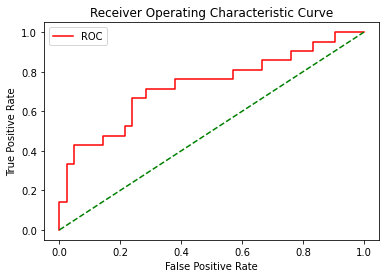

In [265]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
prob = model.predict_proba(X_test)
prob = prob[:, 1]
fper, tper, thresholds = roc_curve(y_test, prob)
plot_roc_curve(fper, tper)

In [83]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state =42)
fit = forest.fit(X_train,y_train)
pred = model.predict(X_test)
import sklearn.metrics as metrics

print(metrics.accuracy_score(pred,y_test))

0.6904761904761905


C:\Users\mix68\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [271]:
forest.feature_importances_

array([0.01094101, 0.20176127, 0.04232985, 0.0337469 , 0.01631912,
       0.01705844, 0.04249443, 0.04054776, 0.03126004, 0.02575343,
       0.06093494, 0.02617506, 0.01864292, 0.02457852, 0.05868535,
       0.0697298 , 0.06932495, 0.06537027, 0.0643871 , 0.07995885])

In [81]:
from sklearn import svm

model = svm.SVC(probability=True,random_state=42)
model.fit(X_train,y_train)
pred = model.predict(X_test)
import sklearn.metrics as metrics

print(metrics.accuracy_score(pred,y_test))
print('precision', metrics.precision_score(pred,y_test))
print('recall', metrics.recall_score(pred,y_test))
print('f1', metrics.f1_score(pred,y_test))

0.6904761904761905
precision 0.0
recall 0.0
f1 0.0


C:\Users\mix68\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\mix68\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train,y_train)
pred = model.predict(X_test)
import sklearn.metrics as metrics

print(metrics.accuracy_score(pred,y_test))
print('precision', metrics.precision_score(pred,y_test))
print('recall', metrics.recall_score(pred,y_test))
print('f1', metrics.f1_score(pred,y_test))

0.34782608695652173
precision 0.9583333333333334
recall 0.34328358208955223
f1 0.5054945054945055


C:\Users\mix68\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [80]:
from sklearn import tree

model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)
pred = model.predict(X_test)
import sklearn.metrics as metrics

print(metrics.accuracy_score(pred,y_test))
print('precision', metrics.precision_score(pred,y_test))
print('recall', metrics.recall_score(pred,y_test))
print('f1', metrics.f1_score(pred,y_test))

0.5357142857142857
precision 0.9230769230769231
recall 0.39344262295081966
f1 0.5517241379310345


C:\Users\mix68\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [11]:
# Get information about input and outputs
print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape:  {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape:  {y_test.shape}")
print(f"np.unique(y_train): {np.unique(y_train)}")
print(f"np.unique(y_test):  {np.unique(y_test)}")

X_train.shape: (145, 20)
X_test.shape:  (63, 20)
y_train.shape: (145,)
y_test.shape:  (63,)
np.unique(y_train): [0 1]
np.unique(y_test):  [0 1]


In [19]:
from lssvm import LSSVC

In [84]:
model = LSSVC(gamma=10, kernel='rbf', sigma=1)
fit = model.fit(X_train,y_train.values)
pred = model.predict(X_test)
import sklearn.metrics as metrics
print(metrics.accuracy_score(pred,y_test))

0.6904761904761905


In [85]:
print('Polynomial kernel:')
poly = LSSVC(gamma=1, kernel='poly', d=1)
fit = poly.fit(X_train,y_train.values)
pred = poly.predict(X_test)
import sklearn.metrics as metrics
print(metrics.accuracy_score(pred,y_test))

Polynomial kernel:
0.5595238095238095


In [86]:
print('Linear kernel:')
linear = LSSVC(gamma=3, kernel='linear', d=1)
fit = linear.fit(X_train,y_train.values)
pred = linear.predict(X_test)
import sklearn.metrics as metrics
print(metrics.accuracy_score(pred,y_test))

Linear kernel:
0.6190476190476191


In [29]:
y_test

161    0
15     0
73     0
96     1
Name: Diagnosis, dtype: int64

In [140]:

params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber", "perceptron"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "elasticnet", "none"],
}

clf = SGDClassifier(max_iter=1000,random_state =42)
grid = GridSearchCV(clf, param_grid=params, cv=10)

grid.fit(X_train,y_train)

print(grid.best_params_) 


{'alpha': 0.1, 'loss': 'hinge', 'penalty': 'elasticnet'}


In [87]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(alpha =0.1,loss = 'hinge',penalty = 'elasticnet',max_iter=1000,random_state =42)
sgd.fit(X_train,y_train)
predictions = sgd.predict(X_test) 
print('Accuracy: {:.4f}'.format(metrics.accuracy_score(predictions,y_test)))

Accuracy: 0.4048


C:\Users\mix68\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [36]:
from sklearn import tree

tree = tree.DecisionTreeClassifier(random_state =42)
params = {'criterion':['gini','entropy','log_loss'],
          'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],
         'max_features' :['auto','log2','sqrt']}
grid = GridSearchCV(tree, param_grid=params, cv=10)

grid.fit(X_train,y_train)
print(grid.best_params_)
predictions = grid.predict(X_test) 
print('Accuracy: {:.4f}'.format(metrics.accuracy_score(predictions,y_test)))

NameError: name 'GridSearchCV' is not defined

In [37]:
from sklearn.svm import SVC  
svc = SVC(random_state =42)
param_grid = {'C': [0.1,1, 10], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = grid = GridSearchCV(svc,param_grid,refit=True,verbose=2)

grid.fit(X_train,y_train)
print(grid.best_params_)
predictions = grid.predict(X_test) 
print('Accuracy: {:.4f}'.format(metrics.accuracy_score(predictions,y_test)))

NameError: name 'GridSearchCV' is not defined

In [169]:
model = LSSVC(gamma=1, kernel='linear')
model.fit(X_train,y_train.values)
pred = model.predict(X_test)
import sklearn.metrics as metrics

print(metrics.accuracy_score(pred,y_test))

0.7777777777777778


In [287]:
mlp = MLPClassifier(hidden_layer_sizes = (15,15),learning_rate_init =0.01,alpha = 0.00005,
                   activation ='tanh',batch_size = 18,max_iter =50,solver='adam',random_state =42)

mlp.fit(X_Data,y_train) # X is train samples and y is the corresponding labels

predictions = mlp.predict(X_test)
print('Accuracy: {:.8f}'.format(metrics.accuracy_score(predictions,y_test)))

Accuracy: 0.72463768


C:\Users\mix68\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [283]:
mlp1 = MLPClassifier(hidden_layer_sizes = (14,14),learning_rate_init =0.01,alpha = 0.0005,
                   activation ='tanh',batch_size = 18,max_iter =50,solver='adam',random_state =42)

mlp.fit(X_Data,y_train) # X is train samples and y is the corresponding labels

predictions = mlp.predict(X_test)
print('Accuracy: {:.8f}'.format(metrics.accuracy_score(predictions,y_test)))

Accuracy: 0.72463768


C:\Users\mix68\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [244]:
from sklearn.ensemble import VotingClassifier
mlp1 = MLPClassifier(hidden_layer_sizes = (15,15),learning_rate_init =0.01,alpha = 0.00005,
                   activation ='tanh',batch_size = 18,max_iter =50,solver='adam',random_state =42)
mlp2 = MLPClassifier(hidden_layer_sizes = (14,14),learning_rate_init =0.01,alpha = 0.0005,
                   activation ='tanh',batch_size = 18,max_iter =50,solver='adam',random_state =42)

vote = VotingClassifier([('mlp', mlp1), ('mlp2', mlp2)])

In [247]:
fit = vote.fit(X_train,y_train)
pred = vote.predict(X_Test)
print('Accuracy: {:.8f}'.format(metrics.accuracy_score(pred,y_test)))

Accuracy: 0.63492063


C:\Users\mix68\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mix68\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\mix68\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [95]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(learning_rate =0.001)
fit = grad.fit(X_train,y_train.values)
pred = grad.predict(X_test)
import sklearn.metrics as metrics
print(metrics.accuracy_score(pred,y_test))

0.6904761904761905


C:\Users\mix68\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
